<a href="https://colab.research.google.com/github/jasondrebber/GEOL558/blob/main/UnsupervisedML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

### Author: Jason Drebber
##### Date: 1/14/2024

This Notebook shows initial EDA for the world glacier inventory dataset after removing a number of columns which are not considered extremely useful in this sense for learning about possible relationships between the elevation and areal extent data. The elevation is defined by multiple columns in the data while the area is defined by the area and has associated width and length values. There is also a depth variable that I can use to look at. Combined all of these can be used to estimate glacier volume. The data is completely public and available on the National Snow and Ice data center data repository. It was downloaded from kaggle here.

# Set up

In [34]:
# Import packages
from google.colab import drive
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Set the drive mount to pull data from my google drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Access the file (update the path)
file_path = '/content/drive/My Drive/DataScience/wgi.csv'

# Load the database file
wgi = pd.read_csv(file_path)

<ipython-input-9-7eb1102fb524>:5: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  wgi = pd.read_csv(file_path)


# Initial EDA

The following few blocks of code include information basic to the data and some basic EDS to see what the structure of the data is like

In [ ]:
wgi.shape
# This dataset has 39 columns of information about eacch glacier and 132,890 records (rows) which all represent a unique glacier in the database

(132890, 39)

In [ ]:
wgi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132890 entries, 0 to 132889
Data columns (total 39 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Glacier ID                   132890 non-null  object 
 1   Political Unit               132890 non-null  object 
 2   Continent                    132890 non-null  object 
 3   Basin Code                   132890 non-null  object 
 4   Location Code                132890 non-null  object 
 5   Glacier Code                 132890 non-null  object 
 6   Glacier Name                 46751 non-null   object 
 7   Latitude                     132890 non-null  float64
 8   Longitude                    132890 non-null  float64
 9   Primary Class                131406 non-null  float64
 10  Glacier Source               132746 non-null  float64
 11  Basin Count                  15558 non-null   float64
 12  Glacier Form                 131813 non-null  float64
 13 

I added in the .info() method to investigate what all the columns are and what type of data they are represented by which will be useful for understanding the data better.

In [ ]:
wgi.describe()

,Latitude,Longitude,Primary Class,Glacier Source,Basin Count,Glacier Form,Glacier Activity,Activity Start,Activity End,Minimum Elevation,...,Mean Width,Mean Length,Maximum Length,Maximum Length Exposed,Maximum Length Ablation,Mean Depth,Depth Accuracy,Topographic Map Year,Topographic Map Scale,Photograph Year
count,132890.000000,132890.000000,131406.000000,132746.000000,15558.000000,131813.000000,132775.000000,4202.000000,143.000000,117162.000000,...,69966.000000,55258.000000,102593.000000,84621.000000,17051.000000,70071.000000,78685.000000,83697.000000,74586.000000,82464.000000
mean,36.322101,31.902296,5.716231,0.864712,1.031752,3.738918,0.620448,1967.112327,1986.930070,3502.362063,...,0.563436,1.392470,1.417326,1.328634,1.621133,28.415085,2.262960,1970.529565,96838.461508,1974.795899
std,27.821062,83.860643,1.768668,0.494326,0.327473,2.255064,1.072336,11.348193,6.999648,1735.317842,...,0.643816,2.087975,2.560785,1.984061,3.286073,46.480501,0.999009,10.276403,69675.200534,14.107653
min,-71.657200,-179.918000,0.000000,0.000000,1.000000,0.000000,0.000000,1901.000000,1958.000000,0.000000,...,0.000000,0.020000,0.060000,0.000000,0.000000,0.000000,1.000000,1901.000000,750.000000,1900.000000
25%,30.616000,-50.375000,6.000000,1.000000,1.000000,3.000000,0.000000,1963.000000,1986.000000,1800.000000,...,0.300000,0.500000,0.500000,0.500000,0.200000,12.000000,1.000000,1966.000000,50000.000000,1968.000000
50%,38.580000,75.484500,6.000000,1.000000,1.000000,4.000000,0.000000,1967.000000,1986.000000,3840.000000,...,0.400000,0.800000,0.800000,0.800000,0.600000,20.000000,2.000000,1972.000000,90000.000000,1971.000000
75%,49.223000,85.265750,7.000000,1.000000,1.000000,5.000000,1.000000,1975.000000,1988.000000,5020.000000,...,0.700000,1.510000,1.500000,1.500000,2.000000,36.000000,3.000000,1978.000000,100000.000000,1980.000000
max,89.300000,179.680000,9.000000,3.000000,7.000000,9.000000,8.000000,1996.000000,2002.000000,8047.000000,...,29.800000,76.640000,145.000000,125.000000,64.500000,7060.000000,5.000000,1998.000000,1000000.000000,2003.000000


The describe method above shows me the summary statistics for all of the numeric data in the database. It is useful in some cases (such as reporting the mean of the Mean Width of all of the glaciers) and much less useful in some cases (such as reporting the standard deviation of the Latitude of all of the glacier). Overall there are 30 columns of numeric data, but not all of these are useful for assessing numerically, some of them are numeric data representing object data so are in fact categorical (like primary class, glacier source and Glacier Form) or dates (like Activity Start and Activity End). Most of the more interesting numerical information is in the last columns and the first many columns are used to set up the data.

# Data Cleaning

I am going to remove some of the columns that are not necessary for the purposes of this task in a new dataframe, these include more abstract data like the Primary Class, and I will keep the few columns that are truly useful for understanding glaciers in the world. Analyzing all of the columns of data this results in 8 columns of data of elevation, area, length, width and depth information that will be useful to analyze trends in the data.

Additionally, I removed all rows in the dataset that have NaN values to help with applications later. Sadly this reduced the dataset significantly and now there is only 5000 datapoints. Even though this removed a lot of the glaciers with incomplete data this will still be cool.

In [30]:
# Select only the columns with useful data for ML approaches
glaciers = wgi[['Minimum Elevation', 'Mean Elevation', 'Maximum Elevation', 'Snow Line Elevation', 'Glacier Area', 'Mean Length', 'Mean Width', 'Mean Depth']]

# Remove any row with no data
glaciers = glaciers.dropna()
glaciers.shape

(5019, 8)

# Expanded EDA

This section investigates the data in more detail than above beginning to look at trends in the data, comparing different variables, and assessing what questions might be interesting to look at.

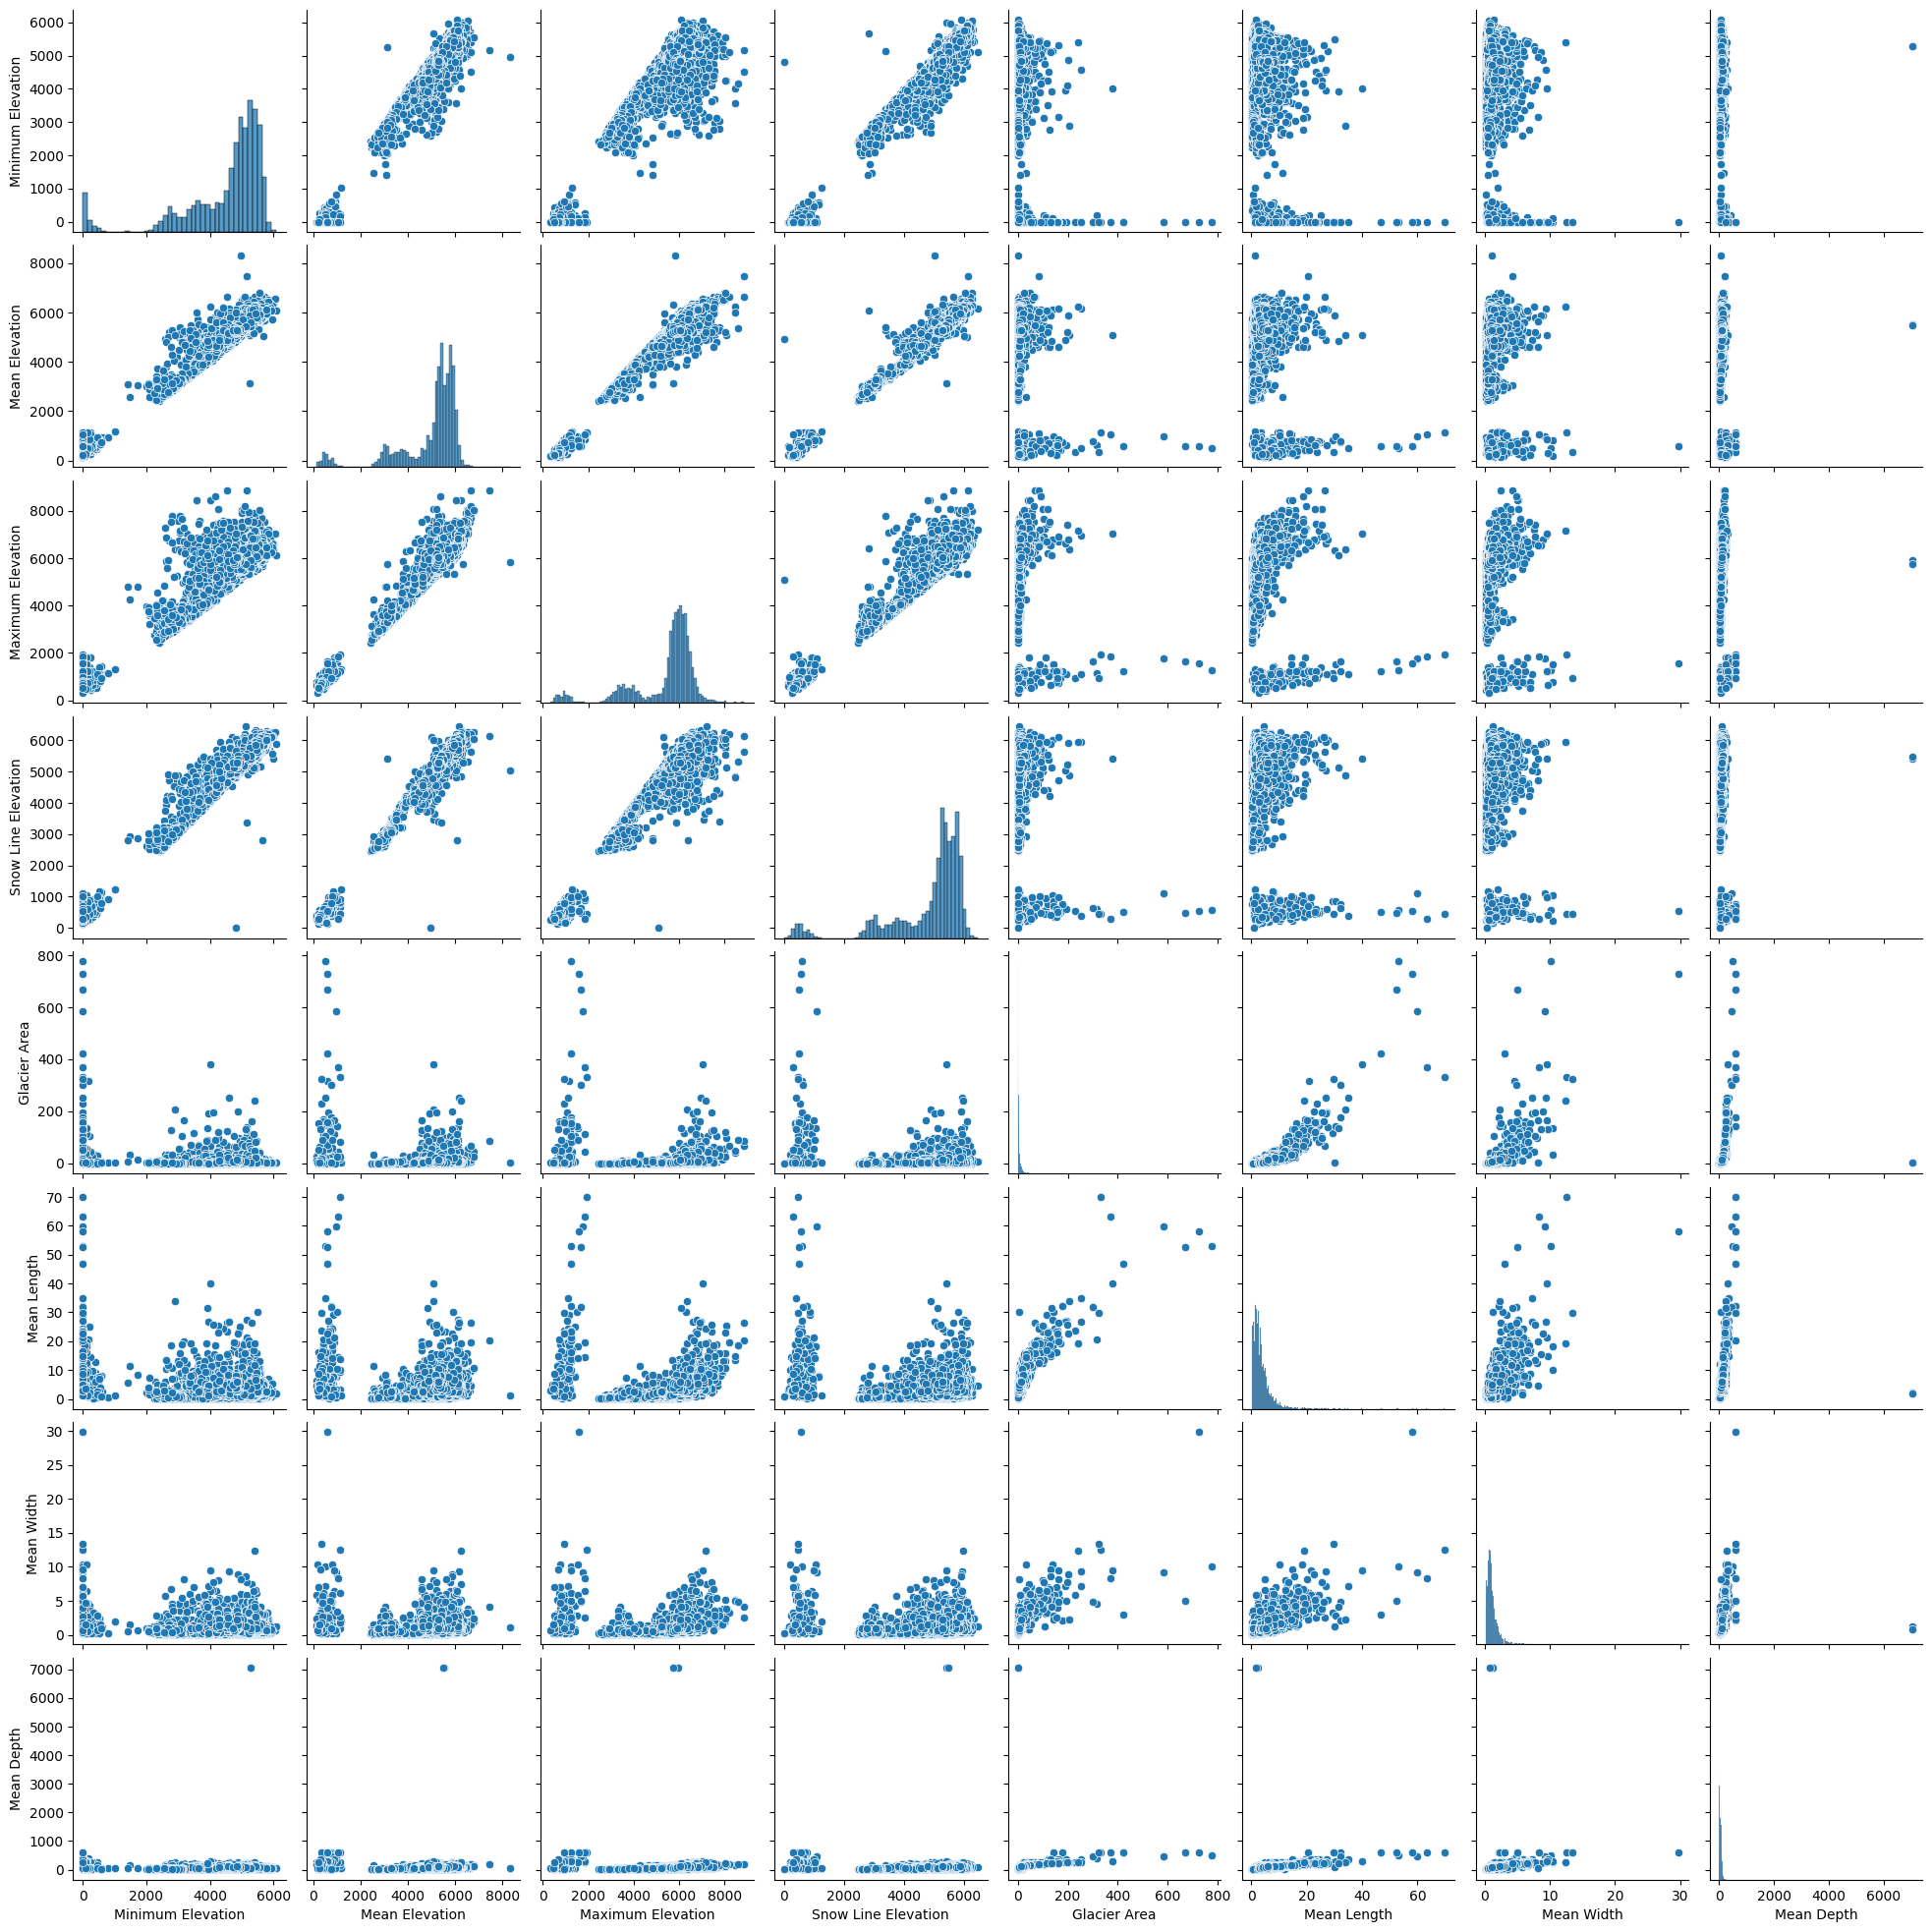

In [31]:
sns.pairplot(glaciers)

The histograms of each individual data column here indicate that there may be three distinct groups in the data, all of the 4 elevation columns (min, max, mean and snowline elevation) all show what appears to be a trimodal distribution with the largest distribution somewhat normally distributed. These data appear to be left skewed which coincides with relevaant domain knowledge about glaciers, they are more likely at higher elevations because due to adiabatic cooling the air is cooler there and it is more likely to allow the glacier to persist through the warmer summer months. The other 4 data columns show an interesting right skew with most of the evalues clustered close to zero, these all appear to be over-dispersed. When comparing the data in the scatter plots, I see a few that appear to show interesting trends with many of them appearing to have multiple (mainly 2) distinct populations. Namely there is a positive linear relationship between glacier area and mean length as well as all of the elevation parameters. These make sense, as the minimum elevation increases the maximum elevation is expected to increase. And as the length of the glacier increases the area is expected to decrease. There are too many variables here though and without doing some preprocessing the skew of each of these variables makes it hard to see any specific trends between everything. This is something I am excited to explore using Learning.

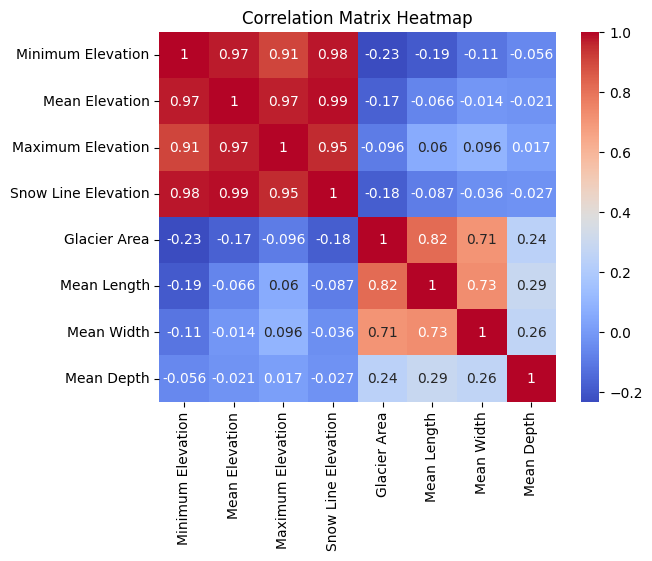

In [32]:
# Calculate the correlation matrix
corr_matrix = glaciers.corr()

# Plot the heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

This shows me that the correlation is low between dissimilar variables such as elevation and width, but is high between the elevation variables and the areal extent variables. All of this makes sense, it is interesting to note however that the mean depth is more strongly correlated with the areal extent variables like length, width and area than with the elevation variables.

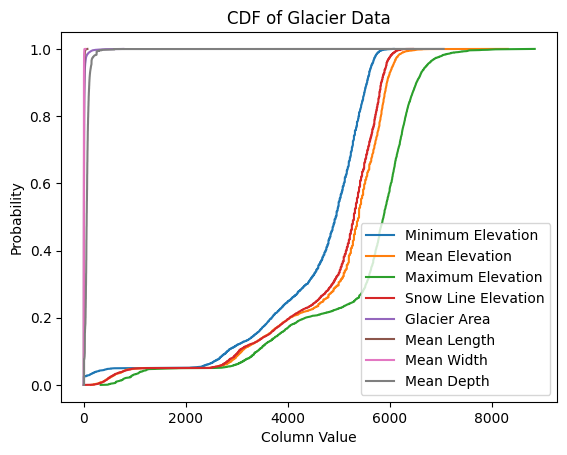

In [36]:
# Look at some CDF's
for i in glaciers.columns:
  data_column = glaciers[i]
  sorted_glaciers = np.sort(data_column)
  cdf = np.arange(1, len(sorted_glaciers) + 1) / len(sorted_glaciers)
  plt.plot(sorted_glaciers, cdf, label=i)

plt.xlabel('Column Value')
plt.ylabel('Probability')
plt.title('CDF of Glacier Data')
plt.legend()
plt.show()

This CDF looks how I expect it to with comparing all of the different data columns. The elevation data is similar thoughout all of the 4 and shows a slow initial increase followed by a sharp increase around 6000 ft. The areal extent and depth columns show a vary rapid increase near zero reflecting their distributions.

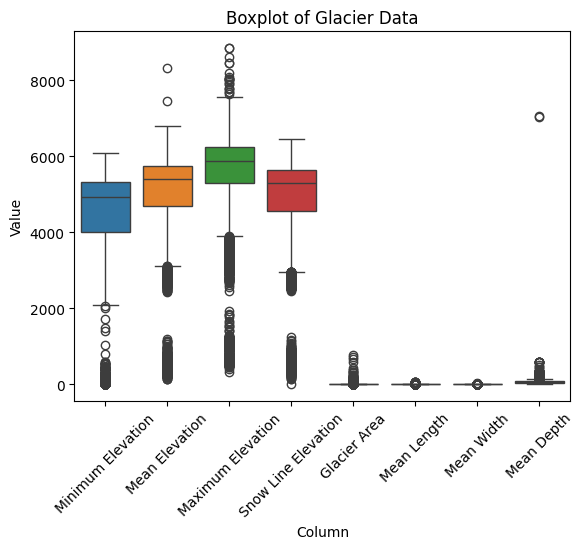

In [43]:
sns.boxplot(data=glaciers)
plt.title('Boxplot of Glacier Data')
plt.xlabel('Column')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.show()

The boxplot shows simlar data to the other plots. The areal extend data columns are difficult to see. Notably this shows me that the Snow Line Elevation is similar to the mean elevation, which was not something I expected, as this depends on the galcier hypsometry so was not a given. The snow line is the imaginary line on the glacier surface where the snow has completely melted off of the surface by the summer resulting in ice instead of snow. It is significant because it changes the albedo (or reflectance) of the surface and impacts the mass balance.

# Analyis

Using this dataset I hope to discover if there is any cluster in the glacier data at all. Upon initial analysis it appears that there may be multiple clusters (as indicated in the histograms) and some relationshiops which I did not expect between the variables. This should be interesting to investigate further. I am not sure how many clusters to expect (probably at least 3) but I am curious how they will cluster, and I want to figure out a way to plot the clusters on a figure by some other paramters I removed before, like the continent to see if there is any unique relationship between these variables and one of the categorical variables.

The original dataset is fairly large comprising over 100,000 data points, however I have reduced it down to only 5,000 data points because that removes all of the data with NaN values which wont be able to be processed.

In terms of big data, I do not think that this classifies as big data because even though there is quite a bit of data, it is structured and I can process it using normal methods fairly quickly, so although it is a large dataset it is not big data by what definitions and discussions I could find online.